In [92]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv("GlobalLandTemperaturesByState.csv", parse_dates=['dt'])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [95]:
df_united_states = df[df["Country"] == "United States"]

In [96]:
df_united_states.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [136]:
df_united_states['State'].dtype

TypeError: 'numpy.dtypes.ObjectDType' object is not callable

In [100]:
df_united_states.dropna(inplace = True)

C:\Users\nisch\AppData\Local\Temp\ipykernel_22312\2302541244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_united_states.dropna(inplace = True)


In [102]:
df_united_states.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7463,1744-04-01,19.075,2.902,Alabama,United States
7464,1744-05-01,21.197,2.844,Alabama,United States
7465,1744-06-01,25.290,2.879,Alabama,United States
7466,1744-07-01,26.420,2.841,Alabama,United States


In [110]:
df_united_states.to_excel('new_data_xls.xlsx', index=False)

In [9]:
df_united_states["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [10]:
df_united_states["Country"].unique()

array(['United States'], dtype=object)

In [11]:
def state_wise_data(dataframe, state):
    # Ensure the data is sorted by date
    data = dataframe.sort_values('dt')
    
    # Set 'dt' as the index
    data.set_index('dt', inplace=True)
    
    # Extract the 'AverageTemperature' column
    temperature_data = data['AverageTemperature']
    
    # Check for missing values and handle them (e.g., fill with the mean)
    temperature_data = temperature_data.fillna(temperature_data.mean())
    
    # Train-Test Split (by integer indices)
    split_index = int(0.8 * len(temperature_data))
    train_data = temperature_data.iloc[:split_index]
    test_data = temperature_data.iloc[split_index:]
    
    # Fit ARIMA Model
    model = ARIMA(train_data, order=(5, 1, 0))  # (p, d, q) can be tuned for better results
    fitted_model = model.fit()
    
    # Forecast on the test data range
    predicted = fitted_model.predict(
        start=len(train_data),  # Start at the end of training data
        end=len(train_data) + len(test_data) - 1,  # End at the end of test data
        dynamic=False
    )
    
    # Forecast future values beyond the test set
    forecast_steps = 12  # Change this to predict more steps into the future
    forecast = fitted_model.forecast(steps=forecast_steps)
    
    # Create time indices for the forecast
    forecast_index = pd.date_range(test_data.index[-1], periods=forecast_steps + 1, freq='M')[1:]
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(temperature_data, label='Actual Data', color='blue')
    plt.plot(test_data.index, predicted, label='Predicted (Test)', color='orange')
    plt.plot(forecast_index, forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    plt.title('Average Temperature Prediction')
    plt.legend()
    plt.show()
    
    # Save the forecast to a file
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecasted Temperature': forecast
    })
    forecast_df.to_csv('forecasted_temperatures.csv', index=False)
    
    print("Forecast saved to 'forecasted_temperatures.csv'")
    


C:\Users\nisch\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nisch\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nisch\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\nisch\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

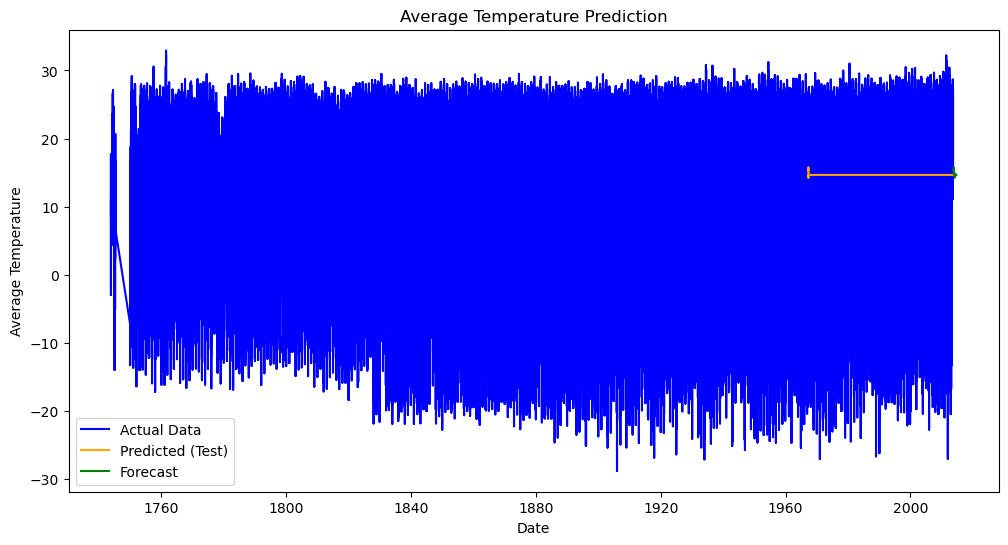

Forecast saved to 'forecasted_temperatures.csv'


In [12]:
state_wise_data(df_united_states, "Wisconsin")

C:\Users\nisch\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecast saved to 'linear_regression_forecast.csv'


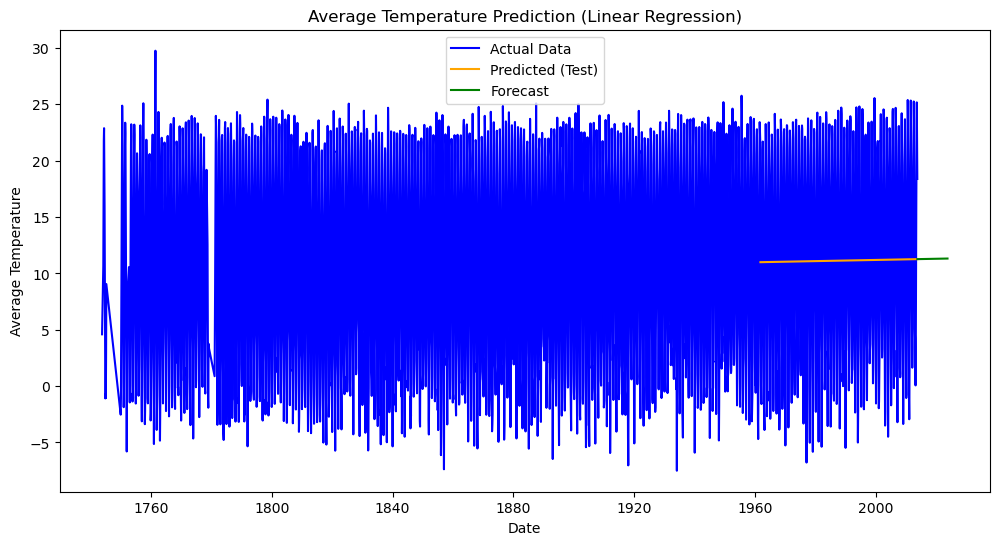

In [58]:
df_united_states.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
7458,1743-11-01,10.722,2.898,Alabama,United States
7459,1743-12-01,NaN,NaN,Alabama,United States
7460,1744-01-01,NaN,NaN,Alabama,United States
7461,1744-02-01,NaN,NaN,Alabama,United States
7462,1744-03-01,NaN,NaN,Alabama,United States


In [112]:
# Extract the year from the date column
df_united_states = df_united_states.copy()
df_united_states['Year'] = df_united_states['dt'].dt.year

# Group by year and calculate the average for each year
yearly_data = df_united_states.groupby(['Year', 'State'], as_index=False).agg({
    'AverageTemperature': 'mean',  # Average of the temperature
    'AverageTemperatureUncertainty': 'mean'  # (Optional) Average of uncertainty
})

In [114]:
yearly_data['State'].unique()

array(['Alabama', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia (State)', 'Illinois', 'Indiana', 'Iowa',
       'Kentucky', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Missouri', 'New Hampshire', 'New Jersey', 'New York',
       'North Carolina', 'Ohio', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'Tennessee', 'Vermont', 'Virginia',
       'West Virginia', 'Wisconsin', 'Arkansas', 'Louisiana',
       'Mississippi', 'Kansas', 'Montana', 'Nebraska', 'North Dakota',
       'South Dakota', 'Oklahoma', 'Wyoming', 'Colorado', 'New Mexico',
       'Texas', 'Idaho', 'Utah', 'Alaska', 'Nevada', 'Oregon',
       'Washington', 'Arizona', 'California', 'Hawaii'], dtype=object)

In [116]:
df_united_states.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year
7458,1743-11-01,10.722,2.898,Alabama,United States,1743
7463,1744-04-01,19.075,2.902,Alabama,United States,1744
7464,1744-05-01,21.197,2.844,Alabama,United States,1744
7465,1744-06-01,25.290,2.879,Alabama,United States,1744
7466,1744-07-01,26.420,2.841,Alabama,United States,1744


In [86]:
def model_lr(state):
    # Ensure the data is sorted by date
    data = df_united_states[df_united_states["State"] == state]
    data = data.sort_values('dt')
    
    # Set 'dt' as the index
    data.set_index('dt', inplace=True)
    
    # Extract the 'AverageTemperature' column
    temperature_data = data['AverageTemperature']
    
    # Handle missing values (fill with the mean)
    temperature_data = temperature_data.fillna(temperature_data.mean())
    
    # Prepare data for linear regression
    # Convert the datetime index to an integer representation (e.g., number of days since the first date)
    data['Days'] = (data.index - data.index[0]).days
    X = data[['Days']]
    y = data['AverageTemperature']
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Forecast future values
    future_days = 3650  # Number of days to predict into the future
    future_dates = pd.date_range(data.index[-1], periods=future_days + 1, freq='D')[1:]
    future_X = np.array([(date - data.index[0]).days for date in future_dates]).reshape(-1, 1)
    future_forecast = model.predict(future_X)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, y, label='Actual Data', color='blue')
    plt.plot(X_test.index, y_pred, label='Predicted (Test)', color='orange')
    plt.plot(future_dates, future_forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    plt.title('Average Temperature Prediction (Linear Regression)')
    plt.legend()
    
    print("Forecast saved to 'linear_regression_forecast.csv'")


C:\Users\nisch\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecast saved to 'linear_regression_forecast.csv'


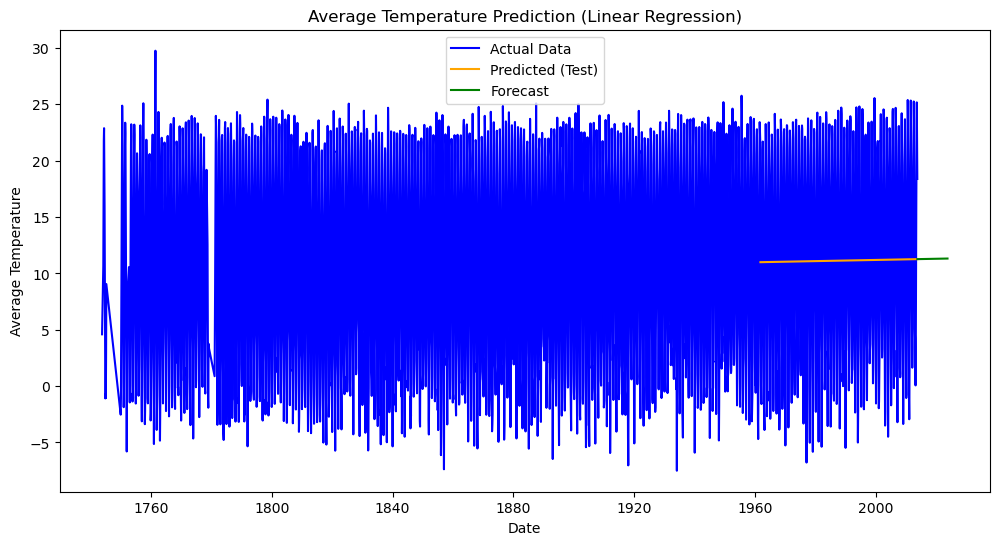

In [88]:
model_lr("New Jersey")

In [186]:
df = pd.read_csv("USTemperature.csv", parse_dates=['dt'])
df.head()

,dt,averagetemp,deviation,country
0,1820-01-01,-6.929,3.931,United States
1,1820-02-01,-2.158,3.033,United States
2,1820-03-01,1.227,2.281,United States
3,1820-04-01,8.978,2.031,United States
4,1820-05-01,13.647,2.063,United States


In [188]:
df['dt'].dtype

dtype('O')

In [207]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


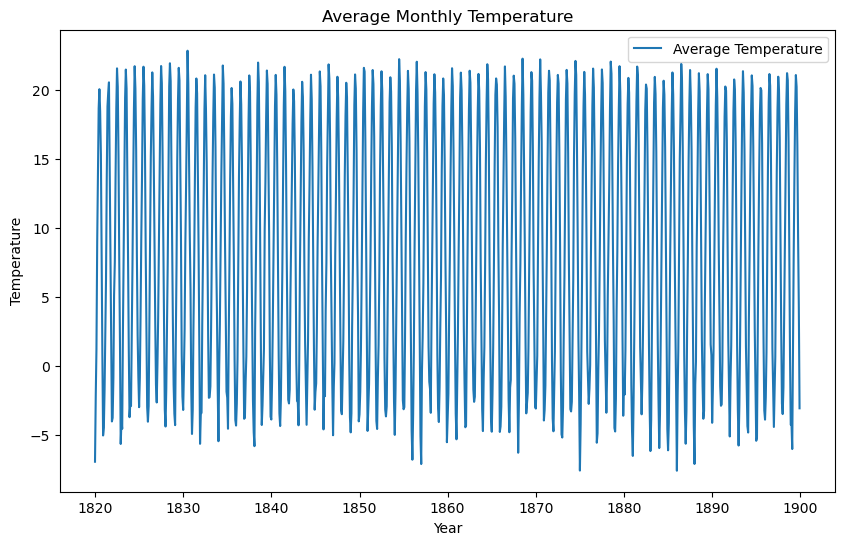

C:\Users\nisch\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.2710 - val_loss: 0.0895
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0807 - val_loss: 0.0500
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0296 - val_loss: 0.0031
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0012 - val_loss: 0.0014
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0015 - val_loss: 0.0012
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0

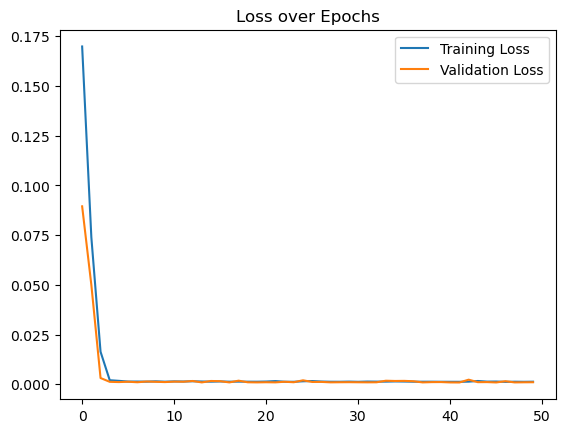

C:\Users\nisch\AppData\Local\Temp\ipykernel_22312\3551534822.py:80: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(data['YearMonth'].iloc[-1], periods=future_steps + 1, freq='M')[1:]


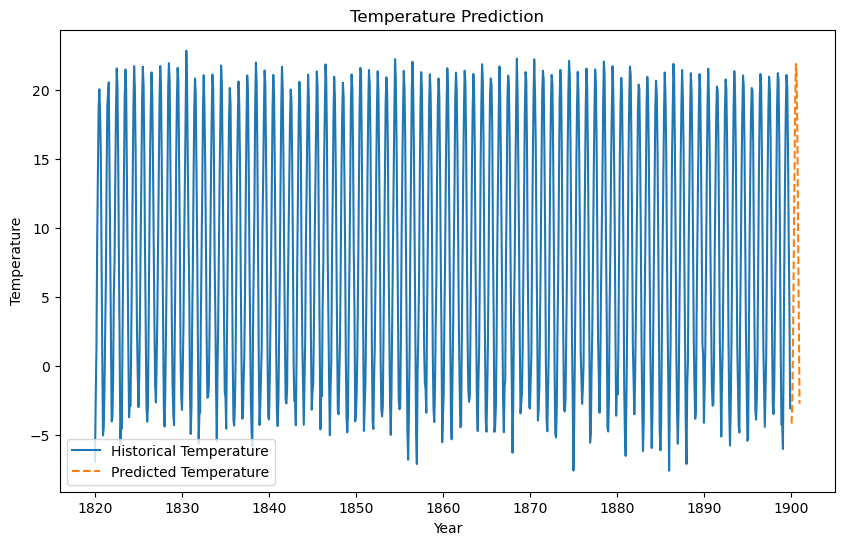

In [211]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
df = pd.read_csv("USTemperature.csv", parse_dates=['dt'])
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
df['YearMonth'] = df['dt'].dt.to_period('M')  # Aggregate monthly
df = df.groupby('YearMonth')['averagetemp'].mean().reset_index()

# Convert to datetime and numeric
df['YearMonth'] = df['YearMonth'].dt.to_timestamp()
data = df[['YearMonth', 'averagetemp']]

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['YearMonth'], data['averagetemp'], label='Average Temperature')
plt.title("Average Monthly Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# Normalize the temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
data['temp_scaled'] = scaler.fit_transform(data[['averagetemp']])

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Sequence length
SEQ_LENGTH = 12  # Use past 12 months to predict the next month

# Create sequences
temp_values = data['temp_scaled'].values
X, y = create_sequences(temp_values, SEQ_LENGTH)

# Reshape for LSTM input: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(SEQ_LENGTH, 1)))
model.add(Dense(1))  # Output layer for single value prediction
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.1)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.show()

# Predict future temperature
future_steps = 12  # Predict next 12 months
input_seq = temp_values[-SEQ_LENGTH:]  # Start with the last known sequence
predictions = []

for _ in range(future_steps):
    pred = model.predict(input_seq.reshape(1, SEQ_LENGTH, 1), verbose=0)
    predictions.append(pred[0, 0])
    input_seq = np.append(input_seq[1:], pred[0, 0])  # Update input sequence

# Inverse scale predictions
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Visualize predictions
future_dates = pd.date_range(data['YearMonth'].iloc[-1], periods=future_steps + 1, freq='M')[1:]

plt.figure(figsize=(10, 6))
plt.plot(data['YearMonth'], data['averagetemp'], label="Historical Temperature")
plt.plot(future_dates, predictions, label="Predicted Temperature", linestyle='--')
plt.title("Temperature Prediction")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()


In [190]:
df = df.copy()
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
df['Year'] = df['dt'].dt.year

# Group by year and calculate the average for each year
yearly_data = df.groupby('Year', as_index=False).agg({
    'averagetemp': 'mean',  # Average of the temperature
    'deviation': 'mean'  # (Optional) Average of uncertainty
})

In [192]:
yearly_data.head()

,Year,averagetemp,deviation
0,1820.0,7.563833,2.291083
1,1821.0,8.004083,2.532750
2,1822.0,8.386833,2.239917
3,1823.0,7.911000,2.327500
4,1824.0,8.502250,2.508500


In [198]:
def model_lr():        
    # Extract the 'AverageTemperature' column
    temperature_data = yearly_data['averagetemp']
    
    # Handle missing values (fill with the mean)
    temperature_data = temperature_data.fillna(temperature_data.mean())
    
    # Prepare data for linear regression
    X = yearly_data[['Year']]
    y = yearly_data['averagetemp']
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Fit the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Forecast future values
    future_days = 3650  # Number of days to predict into the future
    future_dates = pd.date_range(data.index[-1], periods=future_days + 1, freq='D')[1:]
    future_X = np.array([(date - data.index[0]).days for date in future_dates]).reshape(-1, 1)
    future_forecast = model.predict(future_X)
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, y, label='Actual Data', color='blue')
    plt.plot(X_test.index, y_pred, label='Predicted (Test)', color='orange')
    plt.plot(future_dates, future_forecast, label='Forecast', color='green')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature')
    plt.title('Average Temperature Prediction (Linear Regression)')
    plt.legend()
    
    print("Forecast saved to 'linear_regression_forecast.csv'")

In [200]:
model_lr()

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`